In [1]:
from pathlib import Path
from shutil import copyfile
from sklearn.model_selection import train_test_split
import numpy as np
import os
from PIL import Image
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numbers
from tqdm import tqdm
import matplotlib.patches as patches

In [2]:
np.random.seed(0)

In [3]:
def crop(img, top, left, height, width):

    return img.crop((left, top, left + width, top + height))

In [4]:
def center_crop(img, output_size):

    if isinstance(output_size, numbers.Number):
        output_size = (int(output_size), int(output_size))
    image_width, image_height = img.size
    crop_height, crop_width = output_size
    crop_top = int(round((image_height - crop_height) / 2.))
    crop_left = int(round((image_width - crop_width) / 2.))
    return crop(img, crop_top, crop_left, crop_height, crop_width)

In [5]:
def five_crop(img, size):

    if isinstance(size, numbers.Number):
        size = (int(size), int(size))
    else:
        assert len(size) == 2, "Please provide only two dimensions (h, w) for size."

    image_width, image_height = img.size
    crop_height, crop_width = size
    if crop_width > image_width or crop_height > image_height:
        msg = "Requested crop size {} is bigger than input size {}"
        raise ValueError(msg.format(size, (image_height, image_width)))

    tl = img.crop((0, 0, crop_width, crop_height))
    tr = img.crop((image_width - crop_width, 0, image_width, crop_height))
    bl = img.crop((0, image_height - crop_height, crop_width, image_height))
    br = img.crop((image_width - crop_width, image_height - crop_height,
                   image_width, image_height))
    center = center_crop(img, (crop_height, crop_width))
    return [tl, tr, bl, br, center]

In [6]:
def ten_crop(img, size, vertical_flip=False):

    if isinstance(size, numbers.Number):
        size = (int(size), int(size))
    else:
        assert len(size) == 2, "Please provide only two dimensions (h, w) for size."

    first_five = five_crop(img, size)

    img_2 = img.transpose(Image.FLIP_LEFT_RIGHT)

    second_five = five_crop(img_2, size)
    return first_five + second_five

In [7]:
def get_files_sets():
    path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/ICIAR2018_BACH_Challenge/'
    paths = [str(path) for path in Path(path).rglob('*.tif')]
    
    benign_files = list(filter(lambda f: 'Benign' in f, paths))
    insitu_files = list(filter(lambda f: 'InSitu' in f, paths))
    invasive_files = list(filter(lambda f: 'Invasive' in f, paths))  
    normal_files = list(filter(lambda f: 'Normal' in f, paths))
    
    return benign_files, insitu_files, invasive_files, normal_files

In [8]:
benign, insitu, invasive, normal = get_files_sets()
len(benign), len(insitu), len(invasive),len(normal)

(100, 100, 100, 100)

In [9]:
def get_splits(class_set):
    train_set, test_set = train_test_split(class_set, test_size=0.2)
    
    return train_set, test_set

In [10]:
benign_train_set, benign_test_set = get_splits(benign)
insitu_train_set, insitu_test_set = get_splits(insitu)
invasive_train_set, invasive_test_set = get_splits(invasive)
normal_train_set, normal_test_set = get_splits(normal)

In [11]:
train_set = []
train_set.extend(benign_train_set)
train_set.extend(insitu_train_set)
train_set.extend(invasive_train_set)
train_set.extend(normal_train_set)
len(train_set)

320

In [12]:
test_set = []
test_set.extend(benign_test_set)
test_set.extend(insitu_test_set)
test_set.extend(invasive_test_set)
test_set.extend(normal_test_set)
len(test_set)

80

### Slide visualization

In [26]:
Image.open(benign_train_set[0]).size

(2048, 1536)

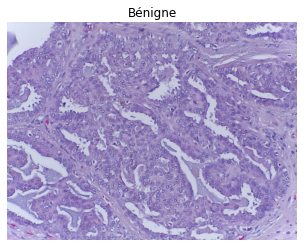

In [13]:
plt.figure()
plt.imshow(Image.open(benign_train_set[0]))
plt.title('Bénigne')
plt.axis('off')
plt.savefig('iciar_benign_ppt.png', quality=100, transparent=True)

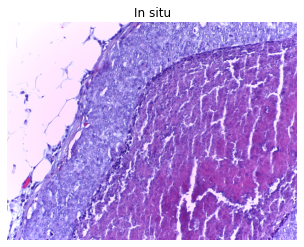

In [14]:
plt.figure()
plt.imshow(Image.open(insitu_train_set[20]))
plt.title('In situ')
plt.axis('off')
plt.savefig('iciar_insitu_ppt.png', quality=100, transparent=True)

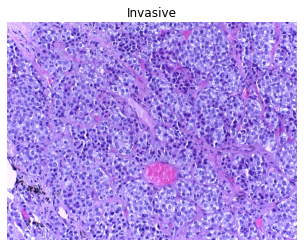

In [15]:
plt.figure()
plt.imshow(Image.open(invasive_train_set[0]))
plt.title('Invasive')
plt.axis('off')
plt.savefig('iciar_invasive_ppt.png', quality=100, transparent=True)

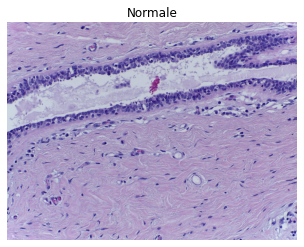

In [16]:
plt.figure()
plt.imshow(Image.open(normal[0]))
plt.title('Normale')
plt.axis('off')
plt.savefig('iciar_normal_ppt.png', quality=100, transparent=True)

### Patches visualization

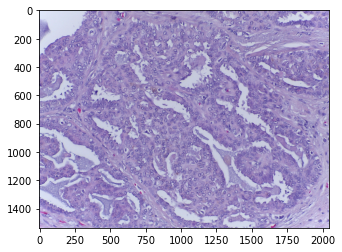

In [17]:
pic = Image.open(train_set[0])
plt.figure()
plt.imshow(pic)

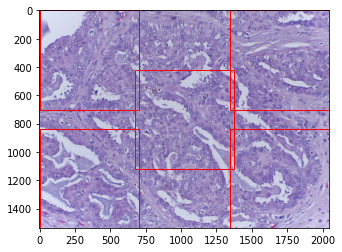

In [18]:
fig,ax = plt.subplots(1)
ax.imshow(pic)

crop_height, crop_width = (700,700)

top_left = patches.Rectangle((0,0), crop_height, crop_width,linewidth=1,edgecolor='r',facecolor='none')
top_right = patches.Rectangle((2048-crop_height,0), crop_height, crop_width,linewidth=1,edgecolor='r',facecolor='none')

bottom_left = patches.Rectangle((0,1536-crop_height), crop_height, crop_width,linewidth=1,edgecolor='r',facecolor='none')
bottom_right = patches.Rectangle((2048-crop_height, 1536-crop_height), crop_height, crop_width,linewidth=1,edgecolor='r',facecolor='none')

image_width, image_height = 2048, 1536

crop_top = int(round((image_height - crop_height) / 2.))
crop_left = int(round((image_width - crop_width) / 2.))
center = patches.Rectangle((crop_left,crop_top), crop_height, crop_width,linewidth=1,edgecolor='r',facecolor='none')

ax.add_patch(top_left)
ax.add_patch(top_right)
ax.add_patch(bottom_left)
ax.add_patch(bottom_right)
ax.add_patch(center)

In [22]:
crops = ten_crop(pic ,(700,700))
print(crops[0].size)
crops = resize_pil(crops, (150,150))
print(crops[0].size)

(700, 700)
(150, 150)


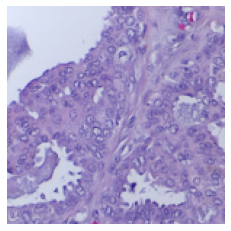

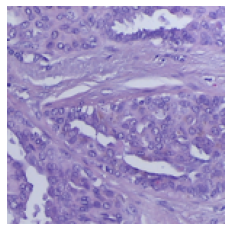

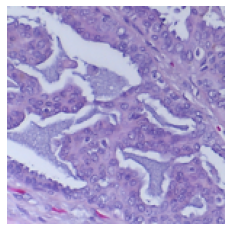

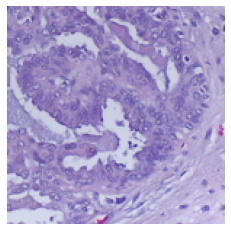

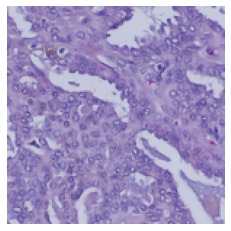

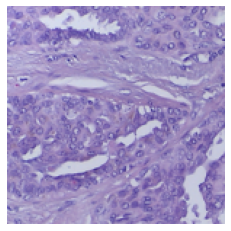

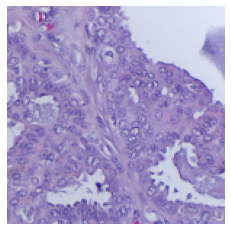

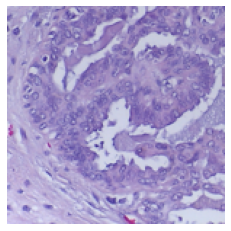

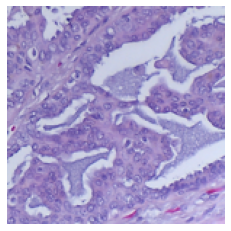

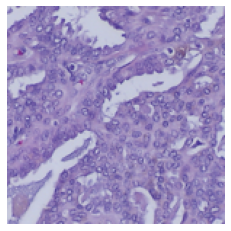

In [25]:
for i, crop in enumerate(crops):
    plt.figure()
    plt.imshow(crop)
    plt.axis('off')

### Extraction

In [19]:
def resize_pil(pil_list, size):
    return [img.resize(size) for img in pil_list]

In [ ]:
def get_label(file_name):
    if 'Benign' in file_name:
        return 0
    elif 'InSitu' in file_name:
        return 1
    elif 'Invasive' in file_name:
        return 2
    elif 'Normal' in file_name:
        return 3

In [ ]:
def parse_files_set(files_set, mode='single', crop_size=(700,700), resize_size=(150,150)):
    
    modes = {
        'single': (center_crop, 1),
        'five' : (five_crop, 5),
        'ten' : (ten_crop, 10)
    }
    
    croper, multiplier = modes[mode]
    
    X = []
    y = []
    
    for f in tqdm(files_set):
        img = Image.open(f)
        imgs = croper(img, crop_size)
        
        if mode is not 'single':
            imgs = resize_pil(imgs, resize_size)
            np_imgs = [np.array(pic) for pic in imgs]
            X.extend(np_imgs)
            y.extend(multiplier * [get_label(f)])
        else:
            imgs = imgs.resize(resize_size)
            np_imgs = np.array(imgs)
            X.append(np_imgs)
            y.append(get_label(f))
    
    X = np.array(X).astype('float32') / 255
    y = np.asarray(y, dtype='uint8')
    
    return X, y

In [ ]:
mode = 'five'
X_train, y_train = parse_files_set(train_set, mode=mode)
X_test, y_test = parse_files_set(test_set, mode=mode)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [ ]:
X_train[0], X_test[0]

In [ ]:
for i in range(10):
    plt.figure()
    plt.imshow(X_train[i])
    plt.title(y_train[i])

### Save to npy files

In [ ]:
base_path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/iciar/'
path_format = base_path + '{}'
p = Path(base_path)
p.mkdir(parents=True, exist_ok=True)

In [ ]:
mode = 'ten'
X_train, y_train = parse_files_set(train_set, mode=mode)
X_test, y_test = parse_files_set(test_set, mode=mode)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

np.save(path_format.format('X_train_ten'), X_train)
np.save(path_format.format('y_train_ten'), y_train)
np.save(path_format.format('X_test_ten'), X_test)
np.save(path_format.format('y_test_ten'), y_test)

In [ ]:
mode = 'five'
X_train, y_train = parse_files_set(train_set, mode=mode)
X_test, y_test = parse_files_set(test_set, mode=mode)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

np.save(path_format.format('X_train_five'), X_train)
np.save(path_format.format('y_train_five'), y_train)
np.save(path_format.format('X_test_five'), X_test)
np.save(path_format.format('y_test_five'), y_test)

In [ ]:
mode = 'single'
X_train, y_train = parse_files_set(train_set, mode=mode)
X_test, y_test = parse_files_set(test_set, mode=mode)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

np.save(path_format.format('X_train_single'), X_train)
np.save(path_format.format('y_train_single'), y_train)
np.save(path_format.format('X_test_single'), X_test)
np.save(path_format.format('y_test_single'), y_test)

In [13]:
def load_iciar(mode):
    assert mode in ['single', 'five', 'ten']
    
    path = '/home/ens/AM90950/sys866/DiscriminativeActiveLearning/data/iciar/'
    
    x_train_file = 'X_train_{}.npy'.format(mode)
    y_train_file = 'y_train_{}.npy'.format(mode)    
    x_test_file = 'X_test_{}.npy'.format(mode)  
    y_test_file = 'y_test_{}.npy'.format(mode)
    
    X_train = np.load(path + x_train_file)
    y_train = np.load(path + y_train_file)
    X_test = np.load(path + x_test_file)
    y_test = np.load(path + y_test_file)
    
    return (X_train, y_train), (X_test, y_test)

In [14]:
(X_train, y_train), (X_test, y_test) = load_iciar('single')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((320, 150, 150, 3), (320,), (80, 150, 150, 3), (80,))

In [15]:
(X_train, y_train), (X_test, y_test) = load_iciar('five')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 150, 150, 3), (1600,), (400, 150, 150, 3), (400,))

In [16]:
(X_train, y_train), (X_test, y_test) = load_iciar('ten')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3200, 150, 150, 3), (3200,), (800, 150, 150, 3), (800,))

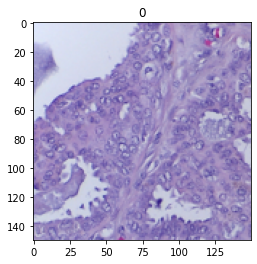

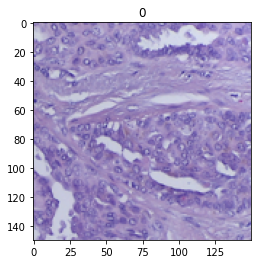

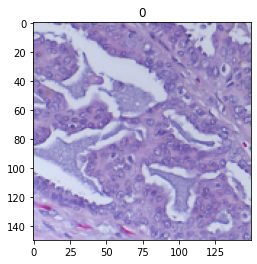

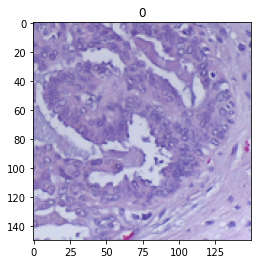

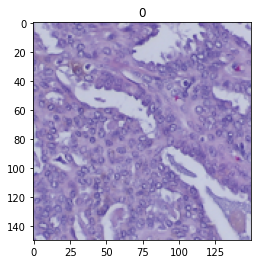

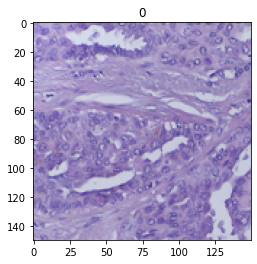

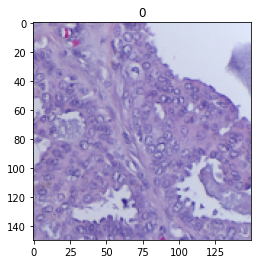

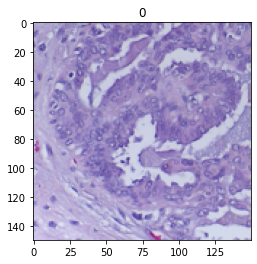

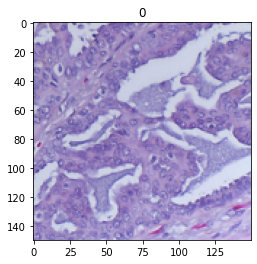

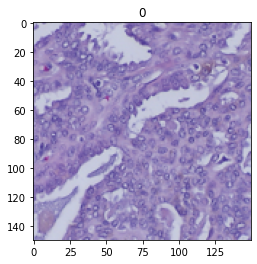

In [17]:
for i in range(10):
    plt.figure()
    plt.imshow(X_train[i])
    plt.title(y_train[i])

In [18]:
X_train[0]

array([[[0.8784314 , 0.9019608 , 0.9882353 ],
        [0.8745098 , 0.9098039 , 0.9764706 ],
        [0.8745098 , 0.90588236, 0.98039216],
        ...,
        [0.6392157 , 0.6039216 , 0.76862746],
        [0.64705884, 0.627451  , 0.77254903],
        [0.6392157 , 0.61960787, 0.7607843 ]],

       [[0.8784314 , 0.9098039 , 0.972549  ],
        [0.88235295, 0.9137255 , 0.98039216],
        [0.8784314 , 0.9098039 , 0.9882353 ],
        ...,
        [0.627451  , 0.5686275 , 0.7607843 ],
        [0.6156863 , 0.5764706 , 0.76862746],
        [0.63529414, 0.6       , 0.7764706 ]],

       [[0.8784314 , 0.8980392 , 0.972549  ],
        [0.87058824, 0.90588236, 0.9764706 ],
        [0.8745098 , 0.9098039 , 0.99215686],
        ...,
        [0.5882353 , 0.5176471 , 0.73333335],
        [0.5882353 , 0.5254902 , 0.7411765 ],
        [0.5882353 , 0.52156866, 0.7372549 ]],

       ...,

       [[0.58431375, 0.5372549 , 0.7490196 ],
        [0.6       , 0.5411765 , 0.7294118 ],
        [0.7607843 , 0

In [37]:
classes = [0, 1, 2, 3]
c_counts = [0, 0, 0, 0]
initial_labelled_pool = 100
c_max = initial_labelled_pool / 4
indices = []
vals = []

In [38]:
for i in range(y_train.shape[0]):
    for c in classes:
        if y_train[i] == c and c_counts[c] < c_max:
            indices.append(i)
            c_counts[c] += 1
            vals.append(y_train[i])
    if np.array(c_counts).sum() == initial_labelled_pool:
        break    
        
vals = np.array(vals)

In [41]:
indices, vals, c_counts

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  800,
  801,
  802,
  803,
  804,
  805,
  806,
  807,
  808,
  809,
  810,
  811,
  812,
  813,
  814,
  815,
  816,
  817,
  818,
  819,
  820,
  821,
  822,
  823,
  824,
  1600,
  1601,
  1602,
  1603,
  1604,
  1605,
  1606,
  1607,
  1608,
  1609,
  1610,
  1611,
  1612,
  1613,
  1614,
  1615,
  1616,
  1617,
  1618,
  1619,
  1620,
  1621,
  1622,
  1623,
  1624,
  2400,
  2401,
  2402,
  2403,
  2404,
  2405,
  2406,
  2407,
  2408,
  2409,
  2410,
  2411,
  2412,
  2413,
  2414,
  2415,
  2416,
  2417,
  2418,
  2419,
  2420,
  2421,
  2422,
  2423,
  2424],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [42]:
import pickle

In [43]:
with open('iciar_balanced_100_start.pkl', 'wb') as f:
        pickle.dump(np.array(indices), f)

In [46]:
loaded = np.load('iciar_balanced_100_start.pkl', allow_pickle=True)

In [47]:
loaded

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,  800,  801,  802,  803,  804,  805,  806,  807,
        808,  809,  810,  811,  812,  813,  814,  815,  816,  817,  818,
        819,  820,  821,  822,  823,  824, 1600, 1601, 1602, 1603, 1604,
       1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615,
       1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 2400, 2401,
       2402, 2403, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412,
       2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423,
       2424])

In [48]:
values = y_train[indices]
values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=uint8)